## Exercise 7-1.
Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

C:\Users\danie\nsfg.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
C:\Users\danie\nsfg.py:69: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

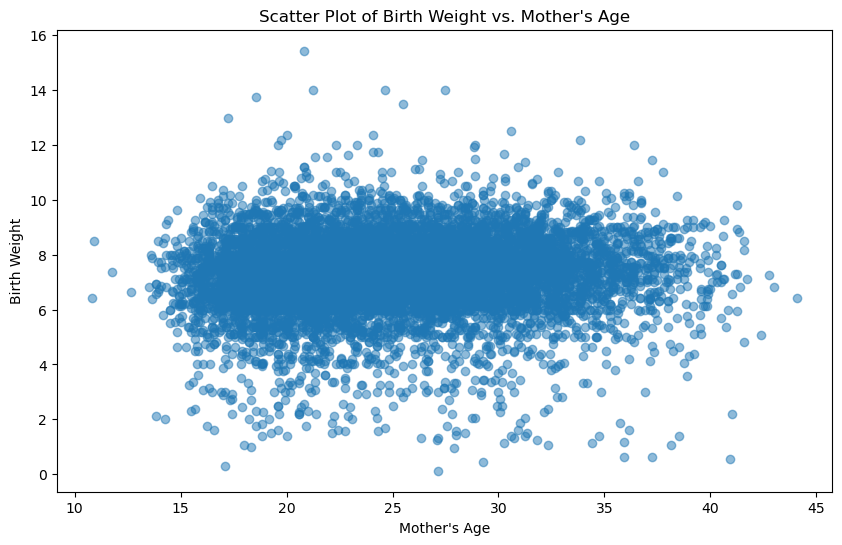

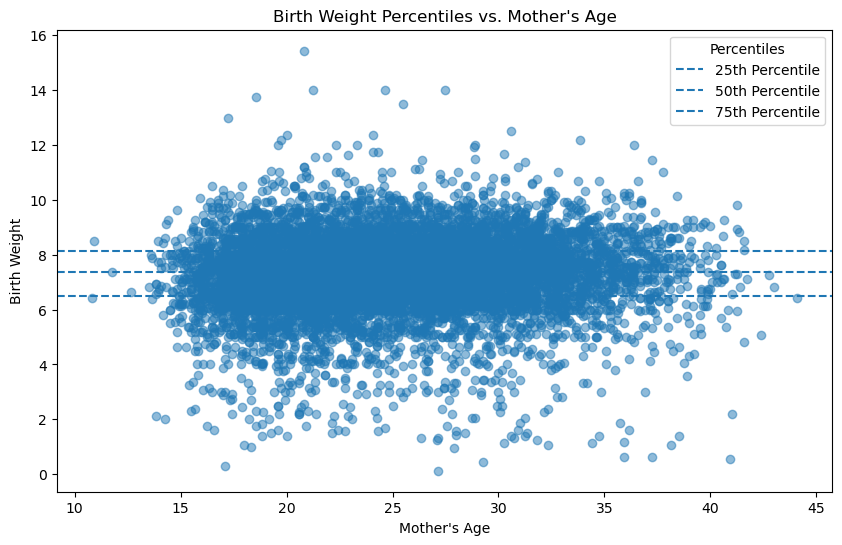

Pearson's correlation: 0.0688339703541091
Spearman's correlation: 0.09461004109658226
There is a weak or no linear relationship between mother's age and birth weight.
There is a weak or no monotonic relationship between mother's age and birth weight.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Import nsfg module
import nsfg

# Load and preprocess NSFG data
preg = nsfg.ReadFemPreg()

# Check the column names and use 'agepreg' (mother's age) and 'totalwgt_lb' (birth weight)
preg = preg[['agepreg', 'totalwgt_lb']].dropna()

# Scatter plot of Birth Weight vs. Mother's Age
plt.figure(figsize=(10, 6))
plt.scatter(preg['agepreg'], preg['totalwgt_lb'], alpha=0.5)
plt.title('Scatter Plot of Birth Weight vs. Mother\'s Age')
plt.xlabel('Mother\'s Age')
plt.ylabel('Birth Weight')
plt.show()

# Calculate percentiles of birth weight
percentiles = [25, 50, 75]
percentile_values = {}
for p in percentiles:
    percentile_values[p] = np.percentile(preg['totalwgt_lb'], p)

# Plot percentiles of birth weight vs. mother's age
plt.figure(figsize=(10, 6))
plt.scatter(preg['agepreg'], preg['totalwgt_lb'], alpha=0.5)

for p in percentiles:
    plt.axhline(percentile_values[p], linestyle='--', label=f'{p}th Percentile')

plt.title('Birth Weight Percentiles vs. Mother\'s Age')
plt.xlabel('Mother\'s Age')
plt.ylabel('Birth Weight')
plt.legend(title="Percentiles")
plt.show()

# Calculate Pearson's and Spearman's correlations
pearson_corr, _ = pearsonr(preg['agepreg'], preg['totalwgt_lb'])
spearman_corr, _ = spearmanr(preg['agepreg'], preg['totalwgt_lb'])

# Output the correlation values
print(f"Pearson's correlation: {pearson_corr}")
print(f"Spearman's correlation: {spearman_corr}")

# Interpretation of the correlations
if pearson_corr > 0.5:
    print("There is a strong positive linear relationship between mother's age and birth weight.")
elif pearson_corr < -0.5:
    print("There is a strong negative linear relationship between mother's age and birth weight.")
else:
    print("There is a weak or no linear relationship between mother's age and birth weight.")

if spearman_corr > 0.5:
    print("There is a strong positive monotonic relationship between mother's age and birth weight.")
elif spearman_corr < -0.5:
    print("There is a strong negative monotonic relationship between mother's age and birth weight.")
else:
    print("There is a weak or no monotonic relationship between mother's age and birth weight.")



## Exercise 8-1. 
In this chapter we used xˉ and median to estimate μ, and found that xˉ yields lower MSE. Also, we used S^2 and S^2_{n-1}  to estimate σ, and found that S^2 is biased and S^2_{n-1}  is unbiased. 

Run similar experiments to see if xˉ and median are biased estimates of μ. Also check whether S^2 or S^2_{n-1} yields a lower MSE. 

Sample Size: 10
Mean Bias: -0.00296, Median Bias: -0.01066
Mean MSE: 0.37907, Median MSE: 0.54141
Sample Size: 10
S^2 Bias: -0.42932, S^2_9 Bias: -0.03258
S^2 MSE: 2.81227, S^2_9 MSE: 3.24545
Sample Size: 20
Mean Bias: -0.00363, Median Bias: 0.00272
Mean MSE: 0.22062, Median MSE: 0.33966
Sample Size: 20
S^2 Bias: -0.17775, S^2_19 Bias: 0.02342
S^2 MSE: 1.52448, S^2_19 MSE: 1.65472
Sample Size: 50
Mean Bias: -0.00145, Median Bias: -0.00564
Mean MSE: 0.07709, Median MSE: 0.12672
Sample Size: 50
S^2 Bias: -0.12680, S^2_49 Bias: -0.04775
S^2 MSE: 0.62757, S^2_49 MSE: 0.63898
Sample Size: 100
Mean Bias: 0.00423, Median Bias: 0.00945
Mean MSE: 0.03847, Median MSE: 0.06391
Sample Size: 100
S^2 Bias: -0.05541, S^2_99 Bias: -0.01556
S^2 MSE: 0.30198, S^2_99 MSE: 0.30522


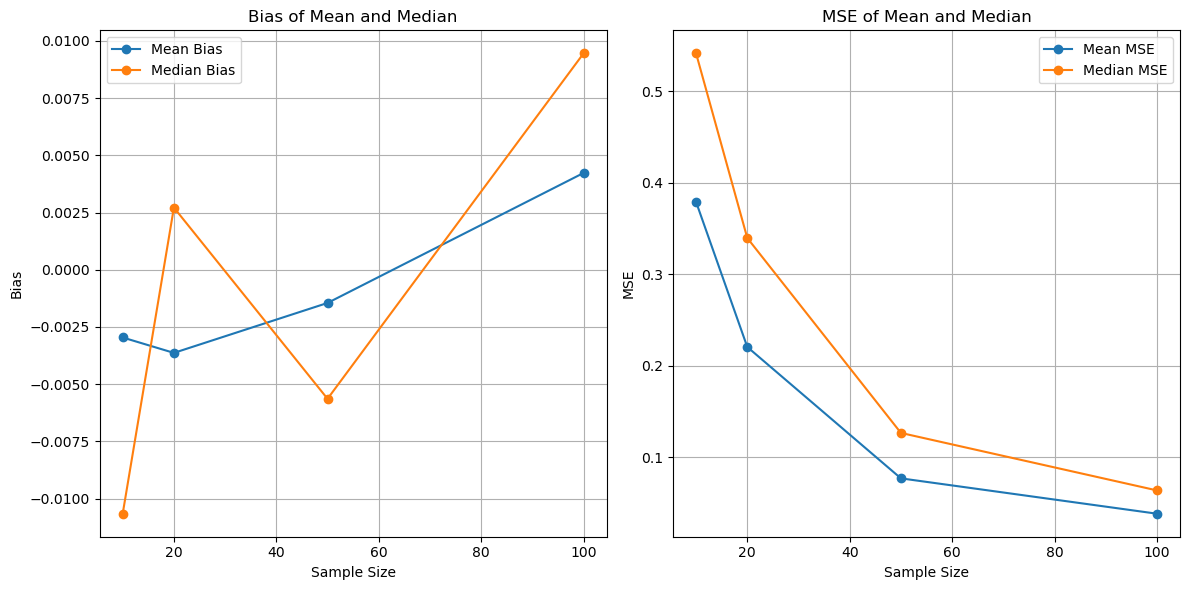

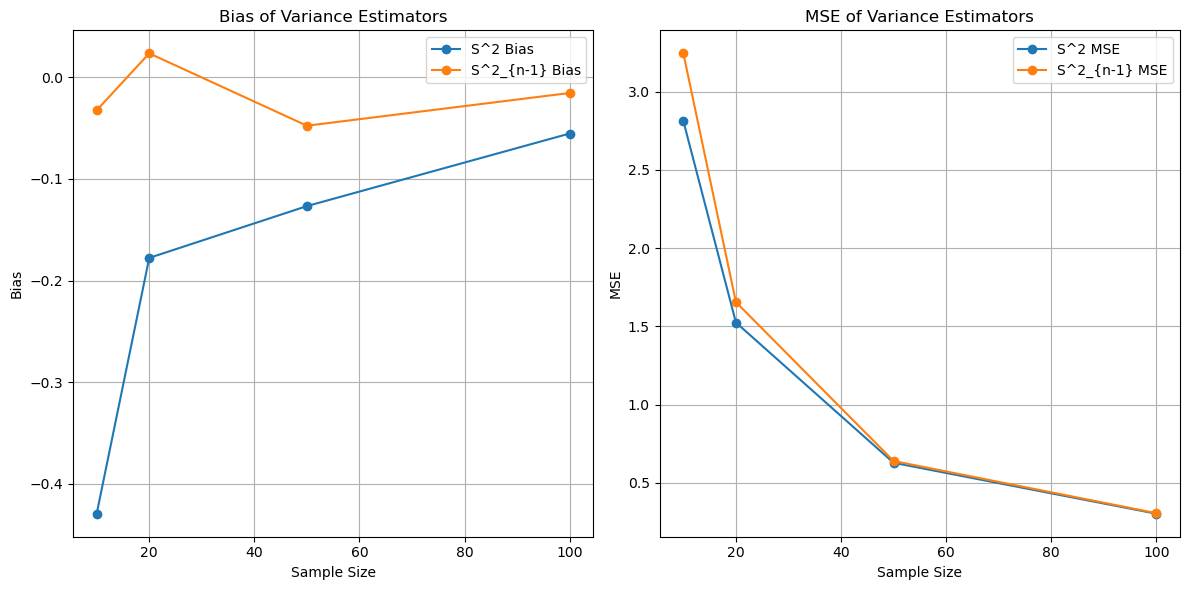

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute MSE
def compute_mse(estimates, true_value):
    return np.mean((np.array(estimates) - true_value) ** 2)

# Simulation for mean and median bias and MSE
def simulate_mean_median(n=10, iters=1000, mu=5, sigma=2):
    """Simulates sampling to check bias and MSE for mean and median.
    
    n: sample size
    iters: number of simulations
    mu: population mean
    sigma: population standard deviation
    """
    mean_estimates = []
    median_estimates = []

    for _ in range(iters):
        sample = np.random.normal(loc=mu, scale=sigma, size=n)
        mean_estimates.append(np.mean(sample))
        median_estimates.append(np.median(sample))

    # Compute bias
    mean_bias = np.mean(mean_estimates) - mu
    median_bias = np.mean(median_estimates) - mu

    # Compute MSE
    mean_mse = compute_mse(mean_estimates, mu)
    median_mse = compute_mse(median_estimates, mu)

    print(f"Sample Size: {n}")
    print(f"Mean Bias: {mean_bias:.5f}, Median Bias: {median_bias:.5f}")
    print(f"Mean MSE: {mean_mse:.5f}, Median MSE: {median_mse:.5f}")

    return mean_bias, median_bias, mean_mse, median_mse

# Simulation for variance estimators
def simulate_variance_estimators(n=10, iters=1000, mu=5, sigma=2):
    """Simulates sampling to check bias and MSE for S^2 and S^2_{n-1}.
    
    n: sample size
    iters: number of simulations
    mu: population mean
    sigma: population standard deviation
    """
    biased_var_estimates = []
    unbiased_var_estimates = []

    for _ in range(iters):
        sample = np.random.normal(loc=mu, scale=sigma, size=n)
        biased_var = np.var(sample, ddof=0)  # S^2
        unbiased_var = np.var(sample, ddof=1)  # S^2_{n-1}
        biased_var_estimates.append(biased_var)
        unbiased_var_estimates.append(unbiased_var)

    # Compute bias
    biased_var_bias = np.mean(biased_var_estimates) - sigma**2
    unbiased_var_bias = np.mean(unbiased_var_estimates) - sigma**2

    # Compute MSE
    biased_var_mse = compute_mse(biased_var_estimates, sigma**2)
    unbiased_var_mse = compute_mse(unbiased_var_estimates, sigma**2)

    print(f"Sample Size: {n}")
    print(f"S^2 Bias: {biased_var_bias:.5f}, S^2_{n-1} Bias: {unbiased_var_bias:.5f}")
    print(f"S^2 MSE: {biased_var_mse:.5f}, S^2_{n-1} MSE: {unbiased_var_mse:.5f}")

    return biased_var_bias, unbiased_var_bias, biased_var_mse, unbiased_var_mse

# Experiment with different sample sizes
sample_sizes = [10, 20, 50, 100]
mean_biases, median_biases, mean_mses, median_mses = [], [], [], []
biased_var_biases, unbiased_var_biases, biased_var_mses, unbiased_var_mses = [], [], [], []

# Run simulations for each sample size
for n in sample_sizes:
    # Mean and Median Simulations
    mean_bias, median_bias, mean_mse, median_mse = simulate_mean_median(n=n)
    mean_biases.append(mean_bias)
    median_biases.append(median_bias)
    mean_mses.append(mean_mse)
    median_mses.append(median_mse)

    # Variance Simulations
    b_var_bias, ub_var_bias, b_var_mse, ub_var_mse = simulate_variance_estimators(n=n)
    biased_var_biases.append(b_var_bias)
    unbiased_var_biases.append(ub_var_bias)
    biased_var_mses.append(b_var_mse)
    unbiased_var_mses.append(ub_var_mse)

# Plot Bias and MSE for Mean and Median
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, mean_biases, marker='o', label='Mean Bias')
plt.plot(sample_sizes, median_biases, marker='o', label='Median Bias')
plt.xlabel('Sample Size')
plt.ylabel('Bias')
plt.title('Bias of Mean and Median')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(sample_sizes, mean_mses, marker='o', label='Mean MSE')
plt.plot(sample_sizes, median_mses, marker='o', label='Median MSE')
plt.xlabel('Sample Size')
plt.ylabel('MSE')
plt.title('MSE of Mean and Median')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Bias and MSE for Variance Estimators
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, biased_var_biases, marker='o', label='S^2 Bias')
plt.plot(sample_sizes, unbiased_var_biases, marker='o', label='S^2_{n-1} Bias')
plt.xlabel('Sample Size')
plt.ylabel('Bias')
plt.title('Bias of Variance Estimators')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(sample_sizes, biased_var_mses, marker='o', label='S^2 MSE')
plt.plot(sample_sizes, unbiased_var_mses, marker='o', label='S^2_{n-1} MSE')
plt.xlabel('Sample Size')
plt.ylabel('MSE')
plt.title('MSE of Variance Estimators')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## Exercise 8-2. 
Suppose that you draw a sample with size n=10n from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval. Repeat the experiment with a few different values and make a plot of standard error versus n. 

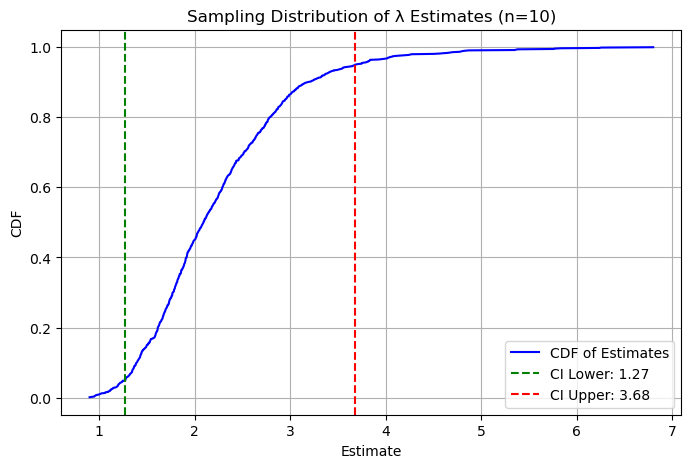

Sample Size: 10
Standard Error: 0.8288305320078326
90% Confidence Interval: [1.27208977 3.67923863]



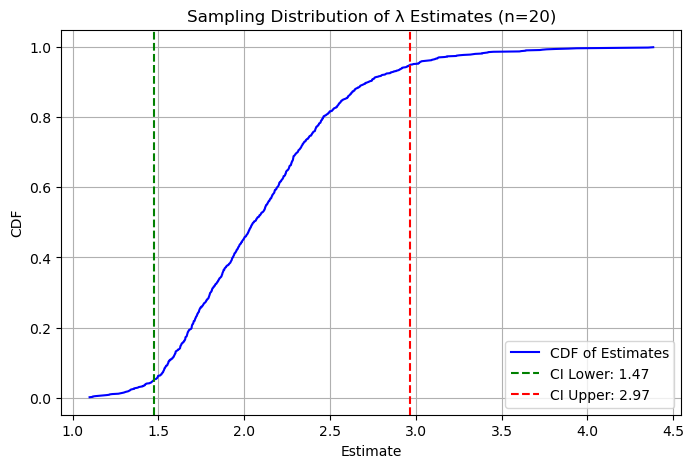

Sample Size: 20
Standard Error: 0.4971215286302706
90% Confidence Interval: [1.47423299 2.96793664]



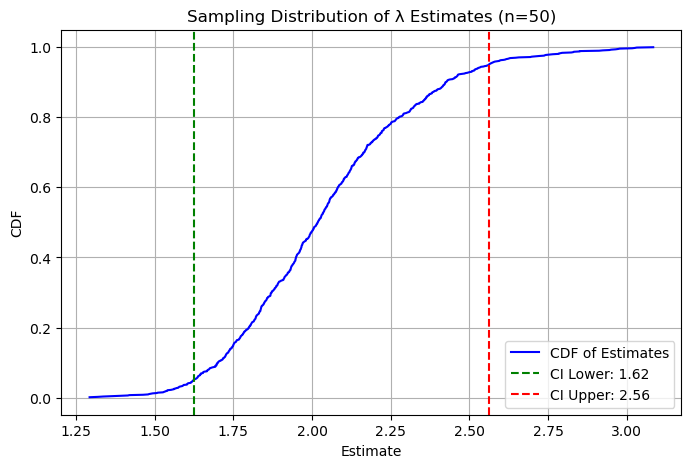

Sample Size: 50
Standard Error: 0.29465585415695517
90% Confidence Interval: [1.62437518 2.56191782]



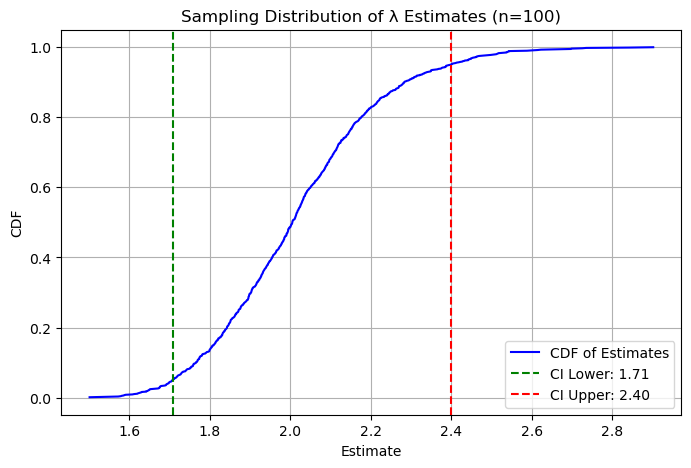

Sample Size: 100
Standard Error: 0.208368884938933
90% Confidence Interval: [1.70792189 2.39876584]



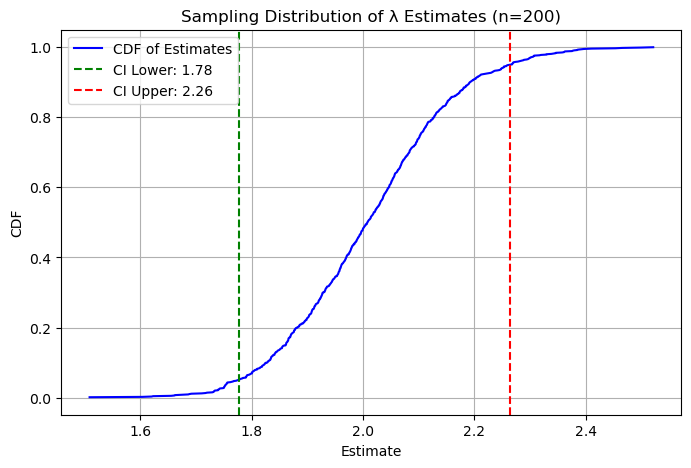

Sample Size: 200
Standard Error: 0.14638286531915623
90% Confidence Interval: [1.77753934 2.26445267]



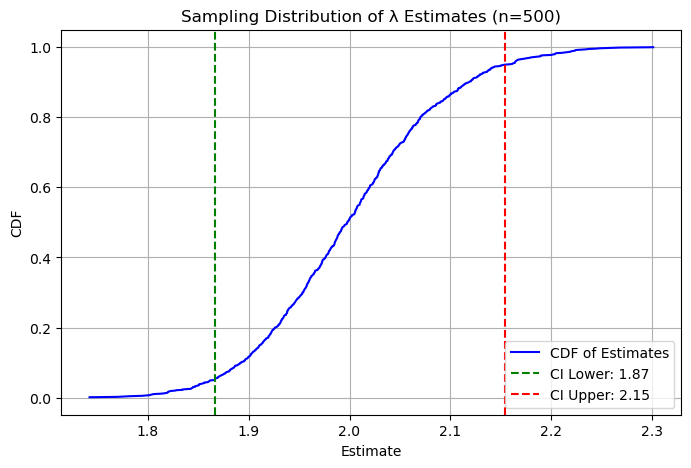

Sample Size: 500
Standard Error: 0.08778269312038005
90% Confidence Interval: [1.86639549 2.15349979]



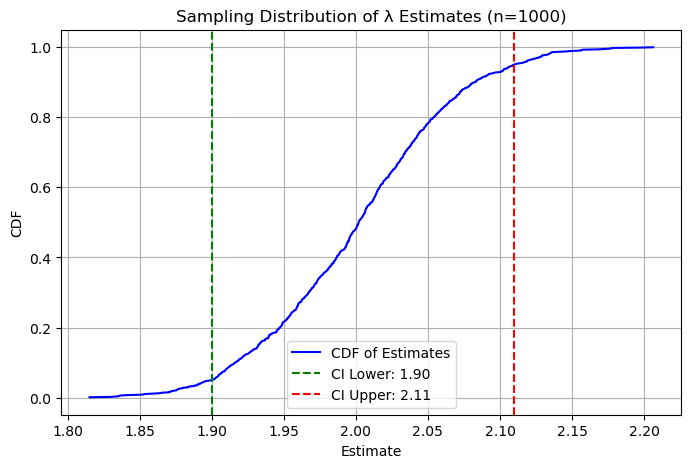

Sample Size: 1000
Standard Error: 0.06394942405337856
90% Confidence Interval: [1.90027151 2.10938893]



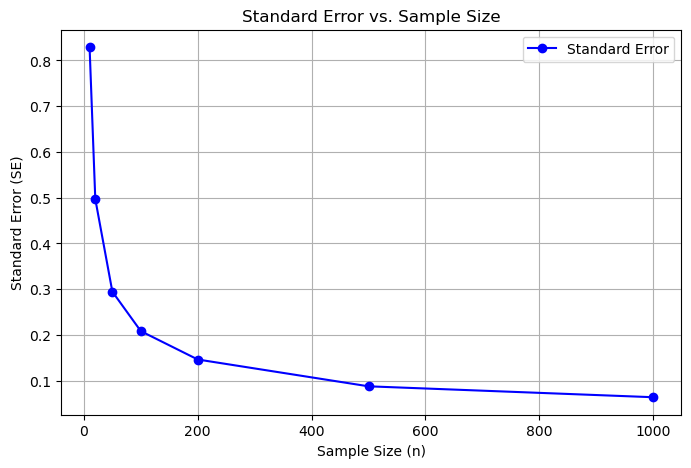

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Root Mean Square Error
def RMSE(estimates, true_value):
    return np.sqrt(np.mean((np.array(estimates) - true_value) ** 2))

# Simulates sampling from an exponential distribution and computes SE
def SimulateSample(lam=2, n=10, iters=1000):
    """Simulates sampling from an exponential distribution and computes standard error.

    lam: parameter of the exponential distribution
    n: sample size
    iters: number of iterations
    """
    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0 / lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    # Compute standard error
    stderr = RMSE(estimates, lam)

    # Compute 90% confidence interval
    ci = np.percentile(estimates, [5, 95])

    # Plot CDF of estimates
    sorted_estimates = np.sort(estimates)
    cdf = np.arange(1, len(estimates) + 1) / len(estimates)

    plt.figure(figsize=(8, 5))
    plt.plot(sorted_estimates, cdf, label='CDF of Estimates', color='blue')
    plt.axvline(ci[0], color='green', linestyle='dashed', label=f'CI Lower: {ci[0]:.2f}')
    plt.axvline(ci[1], color='red', linestyle='dashed', label=f'CI Upper: {ci[1]:.2f}')
    plt.xlabel('Estimate')
    plt.ylabel('CDF')
    plt.title(f'Sampling Distribution of λ Estimates (n={n})')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Sample Size: {n}")
    print(f"Standard Error: {stderr}")
    print(f"90% Confidence Interval: {ci}\n")
    return stderr

# Experiment with different sample sizes
sample_sizes = [10, 20, 50, 100, 200, 500, 1000]
standard_errors = []

# Run simulations for each sample size and calculate SE
for n in sample_sizes:
    stderr = SimulateSample(lam=2, n=n, iters=1000)
    standard_errors.append(stderr)

# Plot standard error versus sample size
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, standard_errors, marker='o', linestyle='-', color='blue', label='Standard Error')
plt.xlabel('Sample Size (n)')
plt.ylabel('Standard Error (SE)')
plt.title('Standard Error vs. Sample Size')
plt.grid(True)
plt.legend()
plt.show()
